# CNN With Keras

Topics:
1. Download Dataset From Kaggle
2. install library
3. load library
4. About Dataset
5. building CNN model:
  - Data processing
  - CNN Architecture
  - Train Model
  - Save Model
  - Load Model and Predict

## Download Dataset From Kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
!pip install kaggle

In [ ]:
# mkdir ~/.kaggle

mkdir: cannot create directory ‘/teamspace/studios/this_studio/.kaggle’: File exists


In [ ]:
!mkdir ~/.kaggle
# !mv kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/teamspace/studios/this_studio/teamspace/studios/thisstudio/.kaggle’: No such file or directory


In [ ]:
! mv ~/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d uciml/iris

Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0
  0%|                                               | 0.00/3.60k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 3.60k/3.60k [00:00<00:00, 8.47MB/s]


In [ ]:
!kaggle datasets download -d amitpant7/lungvision

Dataset URL: https://www.kaggle.com/datasets/amitpant7/lungvision
License(s): unknown
100%|█████████████████████████████████████▉| 3.57G/3.58G [00:30<00:00, 87.0MB/s]
100%|███████████████████████████████████████| 3.58G/3.58G [00:31<00:00, 124MB/s]


In [ ]:
! unzip /teamspace/studios/this_studio/lungvision.zip

Archive:  /teamspace/studios/this_studio/lungvision.zip
  inflating: dataset/dataset/test/normal/009482dc-3db5-48d4-8580-5c89c4f01334.png  
  inflating: dataset/dataset/test/normal/019ca122-9cdf-4704-b7a9-449c8a1c263e.png  
  inflating: dataset/dataset/test/normal/01cfa23b-cc98-43af-a61b-56915f90b7ef.png  
  inflating: dataset/dataset/test/normal/0422a993-6daa-43b9-aa54-80104541f539.png  
  inflating: dataset/dataset/test/normal/075f7167-e5ac-4c3d-954a-33576cb50600.png  
  inflating: dataset/dataset/test/normal/07bc3b67-cc81-47c8-b384-7bc81a3a9fc0.png  
  inflating: dataset/dataset/test/normal/08fda39f-ba68-45cc-9bbb-d416b19c6dc2.png  
  inflating: dataset/dataset/test/normal/090f0fcb-98c9-4324-9857-3bc2a9cfd4e8.png  
  inflating: dataset/dataset/test/normal/09e8fae9-1714-4b54-a1d3-42a29a9717c3.png  
  inflating: dataset/dataset/test/normal/09ea637f-0f6a-427e-8dad-858330a2498e.png  
  inflating: dataset/dataset/test/normal/0a29f841-b738-499a-bc8e-0589de77ef82.png  
  inflating: dataset

## install library

In [ ]:
! pip install opencv-python

In [ ]:
! pip install tensorflow
! pip install keras

## load library

In [2]:
import os
import cv2

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.python.client import device_lib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array


## About Dataset

#### LungVision

Contains PNG images of Normal, Pneumonia and Tuberculosis Lungs

The images are in PNG format. The resolution of the images are 512x512.

The dataset has been divided into train,test and val set.

The lung images dataset is a comprehensive collection of images used for the training and evaluation of deep-learning models for the diagnosis of lung infections. The dataset contains a total of 17,275 images, consisting of 10,406 normal images, 5,775 pneumonia images, and 1,094 tuberculosis infected images. The images were sourced from multiple locations, including RSNA, Montgomery County chest X-ray set, Shenzhen chest X-ray, Qatar University, Doha, Qatar, and the University of Dhaka, Bangladesh, and their collaborators. The original images were in the DCM format, and they were converted to the Png format to ensure compatibility with deep learning models. This dataset is an essential resource for researchers, clinicians, and data scientists working on lung infection diagnosis, and it provides a valuable tool for the development of advanced AI models for lung disease diagnosis.

Dataset Link: [Dataset LungVision](https://www.kaggle.com/datasets/amitpant7/lungvision/data)

## building CNN model

### Data processing

In [ ]:
# data path
data_dir = '/teamspace/studios/this_studio/dataset/dataset'
test_path = data_dir + '/test'
train_path = data_dir + '/train'
val_path = data_dir + '/val'

# dataset class
os.listdir(train_path)

['normal', 'pnemo', 'tb']

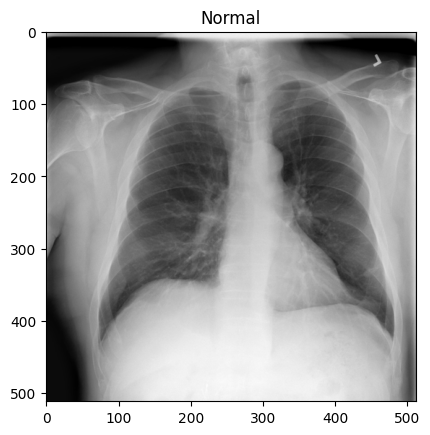

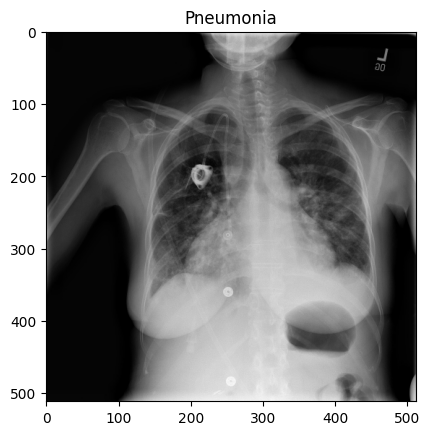

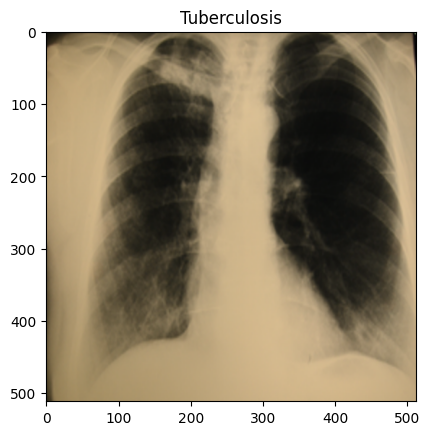

In [ ]:
img_normal = cv2.imread(train_path + '/normal/Normal-2.png')
img_normal = cv2.cvtColor(img_normal, cv2.COLOR_BGR2RGB)
plt.title('Normal')
plt.imshow(img_normal)
plt.show()

img_pnemo = cv2.imread(train_path + '/pnemo/0a9fd225-a33a-47de-849e-156933b21296.png')
plt.title('Pneumonia')
plt.imshow(img_pnemo)
plt.show()

img_tuberculosis = cv2.imread(train_path + '/tb/Tuberculosis-2.png')
plt.title('Tuberculosis')
plt.imshow(img_tuberculosis)
plt.show()

In [ ]:
# dataset class len
print(f'normal : {len(os.listdir(train_path + "/normal"))}')
print(f'pnemo : {len(os.listdir(train_path + "/pnemo"))}')
print(f'tb : {len(os.listdir(train_path + "/tb"))}')

normal : 5256
pnemo : 4042
tb : 765


In [ ]:
# parameters
img_size = 128
batch_size = 32
img_channel = 3

In [ ]:
tarin_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
train_set = tarin_gen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_set = tarin_gen.flow_from_directory(
    val_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 10063 images belonging to 3 classes.
Found 2874 images belonging to 3 classes.


In [ ]:
# class
train_set.class_indices

{'normal': 0, 'pnemo': 1, 'tb': 2}

In [ ]:
# check GPU
device_lib.list_local_devices()

I0000 00:00:1729076165.783047    1534 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729076165.783354    1534 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729076165.783559    1534 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729076165.783840    1534 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15896183320895093342
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 21950365696
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15438693182643687137
 physical_device_desc: "device: 0, name: NVIDIA A10G, pci bus id: 0000:00:1e.0, compute capability: 8.6"
 xla_global_id: 416903419]

### CCN Architecture

In [ ]:
cnn = Sequential()

In [ ]:
cnn.add(Conv2D(64, (3, 3), activation='relu',
               input_shape=(128, 128, 3), padding='same'))

cnn.add(BatchNormalization())

cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

cnn.add(BatchNormalization())

cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

cnn.add(Dropout(0.2))

In [ ]:
cnn.add(Conv2D(128, (5, 5), activation='relu', padding='same'))

cnn.add(BatchNormalization())

cnn.add(Conv2D(128, (5, 5), activation='relu', padding='same'))

cnn.add(BatchNormalization())

cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

cnn.add(Dropout(0.2))

In [ ]:
cnn.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

cnn.add(BatchNormalization())

cnn.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

cnn.add(BatchNormalization())

cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

cnn.add(Dropout(0.2))

In [ ]:
cnn.add(Conv2D(512, (3, 3), activation='relu', padding='same'))

cnn.add(BatchNormalization())

cnn.add(Conv2D(512, (3, 3), activation='relu', padding='same'))

cnn.add(BatchNormalization())

cnn.add(Conv2D(512, (3, 3), activation='relu', padding='same'))

cnn.add(BatchNormalization())

cnn.add(Conv2D(512, (3, 3), activation='relu', padding='same'))

cnn.add(BatchNormalization())

cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

cnn.add(Dropout(0.2))

In [ ]:
cnn.add(Flatten())

cnn.add(Dense(4094, activation='relu'))

cnn.add(Dropout(0.2))

cnn.add(Dense(2048, activation='relu'))

cnn.add(Dropout(0.2))

In [ ]:
cnn.add(Dense(3, activation='softmax'))

In [ ]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
cnn.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_56 (Conv2D)              │ (None, 128, 128, 64)   │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_56          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 128, 128, 64)   │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_57          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 64, 64, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_58          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 64, 64, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_59          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 16, 16, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 152,530,497 (581.86 MB)

 Trainable params: 152,524,609 (581.84 MB)

 Non-trainable params: 5,888 (23.00 KB)

### Train Model

In [ ]:
early_stoping = EarlyStopping(monitor='val_loss',patience= 3,restore_best_weights=True,verbose=1)


In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=2,
                                            factor=0.5,
                                            min_lr = 0.00001,
                                            verbose = 1)

In [ ]:
model = cnn.fit(
    train_set,
    epochs=20,
    validation_data=val_set,
    callbacks=[early_stoping])

Epoch 1/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 129s 370ms/step - accuracy: 0.6439 - loss: 12.3378 - val_accuracy: 0.3212 - val_loss: 2.4186
Epoch 2/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 106s 338ms/step - accuracy: 0.7551 - loss: 0.7899 - val_accuracy: 0.7446 - val_loss: 0.9155
Epoch 3/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 106s 335ms/step - accuracy: 0.8004 - loss: 0.5295 - val_accuracy: 0.6531 - val_loss: 1.0850
Epoch 4/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 105s 333ms/step - accuracy: 0.7948 - loss: 0.5110 - val_accuracy: 0.0759 - val_loss: 158.4869
Epoch 5/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 106s 335ms/step - accuracy: 0.8170 - loss: 0.4909 - val_accuracy: 0.7958 - val_loss: 0.5056
Epoch 6/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 105s 333ms/step - accuracy: 0.8051 - loss: 0.4947 - val_accuracy: 0.5383 - val_loss: 0.9749
Epoch 7/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 106s 336ms/step - accuracy: 0.8221 - loss: 0.4793 - val_accuracy: 0.7011 - val_loss: 0.7712
Epoch 8/20
 41/315 ━━━━━━━━━━━━━━━━━━━━ 1:11 261ms/step - accuracy: 0.816

### Save Model

In [ ]:
cnn.save('LungVisionCnnWithKeras.h5')

### Load Model and Predict

In [4]:
model = load_model('/teamspace/studios/this_studio/LungVisionCnnWithKeras.h5')


In [5]:
# image test ----> normal
image = load_img('/teamspace/studios/this_studio/dataset/dataset/test/normal/Normal-1475.png', target_size=(128, 128, 3))


In [6]:
def predictModel(image):
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255.0
    predict = np.argmax(model.predict(image))
    if predict == 0:
        return 'normal'
    elif predict == 1:
        return 'pneumonia'
    elif predict == 2:
        return 'Tuberculosis'
    else:
        print('invalid')

In [7]:
result = predictModel(image)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


'normal'

In [10]:
# image test ----> pneumonia
image = load_img('/teamspace/studios/this_studio/dataset/dataset/test/pnemo/19a62d7a-3d7d-4b5b-8dca-3247af94f339.png', target_size=(128, 128, 3))


In [11]:
result = predictModel(image)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


'pneumonia'

In [12]:
# image test ----> Tuberculosis
image = load_img('/teamspace/studios/this_studio/dataset/dataset/test/tb/Tuberculosis-479.png', target_size=(128, 128, 3))


In [13]:
result = predictModel(image)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


'Tuberculosis'

### Visualize Architecture of Neural Network

In [14]:
! pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 54.2 MB/s eta 0:00:00


In [49]:
import visualkeras
from PIL import ImageFont
from PIL import Image
from PIL import ImageFont, ImageDraw

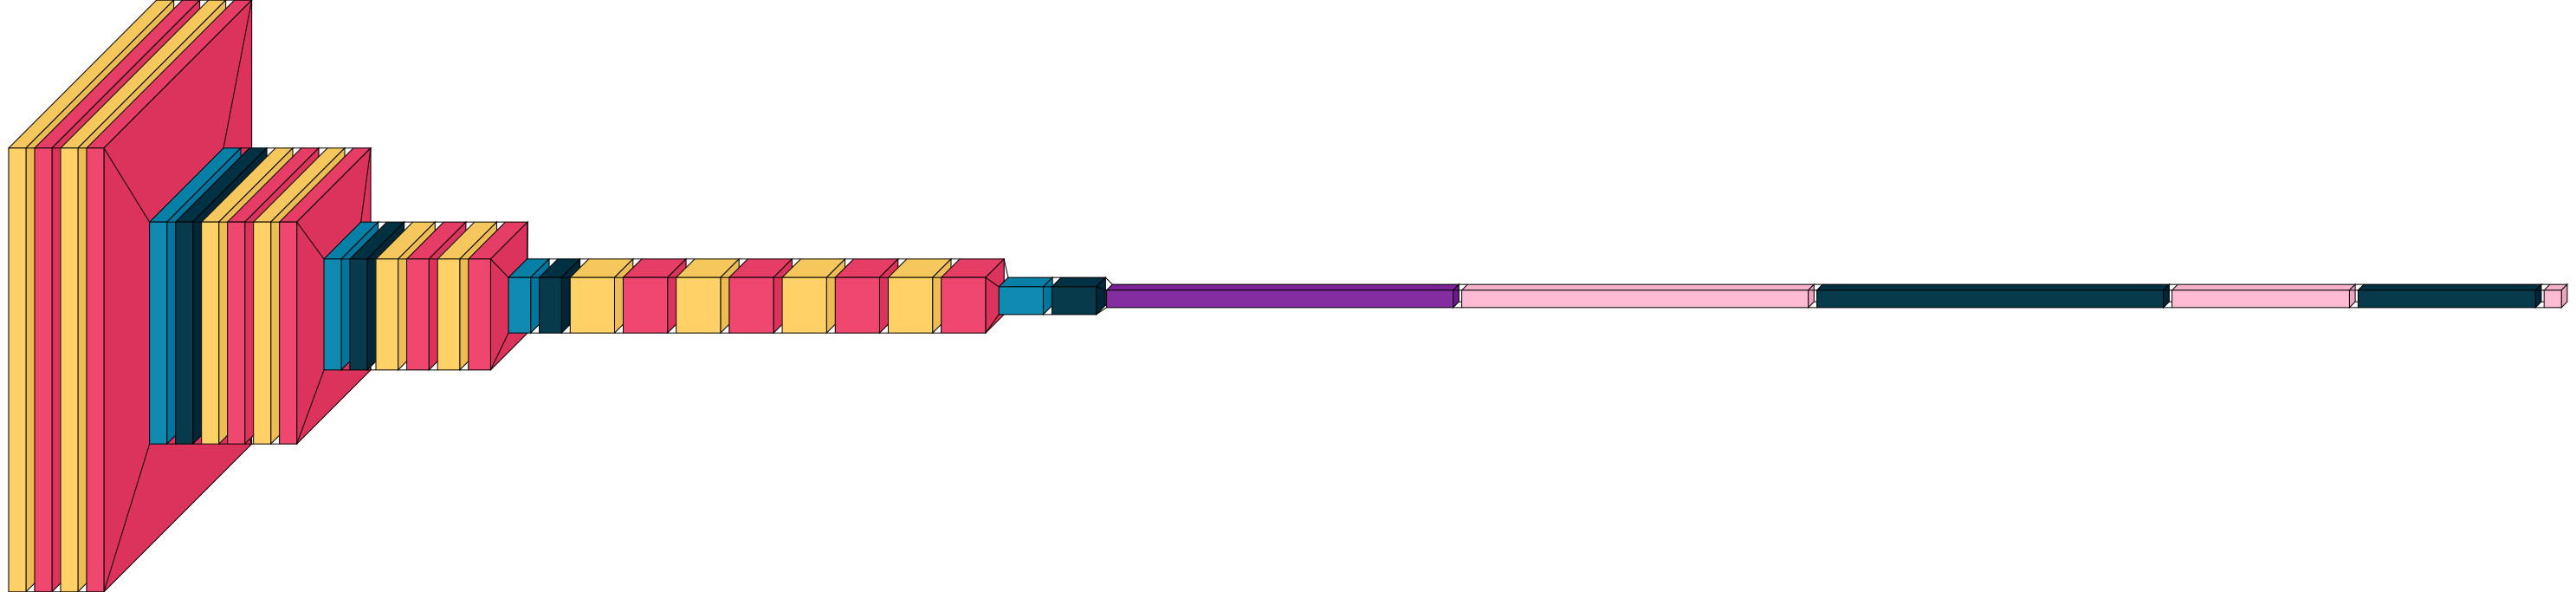

In [59]:
visualkeras.layered_view(model).show()